In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
            batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Users\\Lenovo\\potato-disease1\\training\\AugmentedImages"
)

Found 9957 images belonging to 20 classes.


In [4]:
train_generator.class_indices

{'Cassava__bacterial_blight': 0,
 'Cassava__mosaic_disease': 1,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 2,
 'Corn_(maize)___Common_rust_': 3,
 'Corn_(maize)___Northern_Leaf_Blight': 4,
 'Corn__healthy': 5,
 'Pepper_bell___Bacterial_spot': 6,
 'Pepper_bell___healthy': 7,
 'Potato___Early_blight': 8,
 'Potato___Late_blight': 9,
 'Potato___healthy': 10,
 'Rice_bacterial_leaf_blight': 11,
 'Rice_healthy': 12,
 'Rice_leaf_scald': 13,
 'Rice_narrow_brown_spot': 14,
 'Tomato_Septoria_leaf_spot': 15,
 'Tomato___Early_blight': 16,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 17,
 'Tomato___Tomato_mosaic_virus': 18,
 'Tomato___healthy': 19}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Cassava__bacterial_blight',
 'Cassava__mosaic_disease',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn__healthy',
 'Pepper_bell___Bacterial_spot',
 'Pepper_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Rice_bacterial_leaf_blight',
 'Rice_healthy',
 'Rice_leaf_scald',
 'Rice_narrow_brown_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato___Early_blight',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.46098623 0.41784897 0.44922152]
  [0.46274415 0.4196069  0.45097944]
  [0.46450207 0.4213648  0.45273736]
  ...
  [0.57435447 0.50165015 0.5707436 ]
  [0.57047695 0.50011134 0.56840485]
  [0.5645713  0.5080451  0.5626778 ]]

 [[0.45305252 0.40991527 0.44128782]
  [0.4536385  0.41050124 0.4418738 ]
  [0.45422447 0.41108721 0.44245976]
  ...
  [0.5737685  0.50047815 0.5713296 ]
  [0.569891   0.5006973  0.5672329 ]
  [0.56339943 0.509803   0.5620919 ]]

 [[0.46542394 0.4222867  0.45365924]
  [0.46073616 0.41759887 0.44897142]
  [0.45604837 0.41291112 0.44428366]
  ...
  [0.5731826  0.49930623 0.57191557]
  [0.569305   0.5012833  0.56606096]
  [0.5622274  0.51156086 0.56150585]]

 ...

 [[0.55614126 0.5365334  0.5586197 ]
  [0.5529412  0.53333336 0.5503747 ]
  [0.55420816 0.5339669  0.5600303 ]
  ...
  [0.6208748  0.601267   0.67969835]
  [0.6220468  0.602439   0.68087035]
  [0.6232188  0.60361093 0.6820423 ]]

 [[0.5555552  0.5359474  0.5568618 ]
  [0.5529412  0.53333336 0.55154663]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1414 images belonging to 20 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2865 images belonging to 20 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 20

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(256, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 256)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 512)     1180160   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 512)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 512)       2359808   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 512)       0

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
9957/32



311.15625

In [14]:
1414/32


44.1875

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=311,
    batch_size=128,
    validation_data=validation_generator,
    validation_steps=44,
    verbose=1,
    epochs=20,
)

Epoch 1/20
311/311 [==============================] - 4288s 14s/step - loss: 2.1532 - accuracy: 0.3260 - val_loss: 1.1973 - val_accuracy: 0.5923
Epoch 2/20
311/311 [==============================] - 4300s 14s/step - loss: 0.9416 - accuracy: 0.6754 - val_loss: 0.7118 - val_accuracy: 0.7564
Epoch 3/20
311/311 [==============================] - 4448s 14s/step - loss: 0.6679 - accuracy: 0.7632 - val_loss: 0.5720 - val_accuracy: 0.7990
Epoch 4/20
311/311 [==============================] - 4439s 14s/step - loss: 0.5495 - accuracy: 0.8041 - val_loss: 0.4569 - val_accuracy: 0.8438
Epoch 5/20
311/311 [==============================] - 4451s 14s/step - loss: 0.4444 - accuracy: 0.8385 - val_loss: 0.4436 - val_accuracy: 0.8445
Epoch 6/20
311/311 [==============================] - 4403s 14s/step - loss: 0.3686 - accuracy: 0.8688 - val_loss: 0.4197 - val_accuracy: 0.8445
Epoch 7/20
311/311 [==============================] - 4397s 14s/step - loss: 0.3158 - accuracy: 0.8841 - val_loss: 0.3155 - val_ac

In [16]:
scores = model.evaluate(test_generator)

90/90 [==============================] - 370s 4s/step - loss: 0.2945 - accuracy: 0.9166


In [17]:
scores

[0.2944675385951996, 0.9165794253349304]

first image to predict
actual label: Pepper_bell___healthy
1/1 [==============================] - 4s 4s/step
predicted label: Pepper_bell___healthy


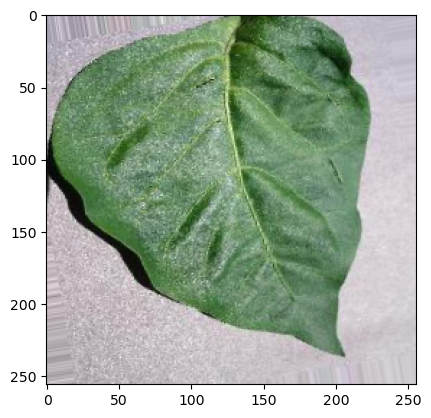

In [18]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [19]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 188ms/step


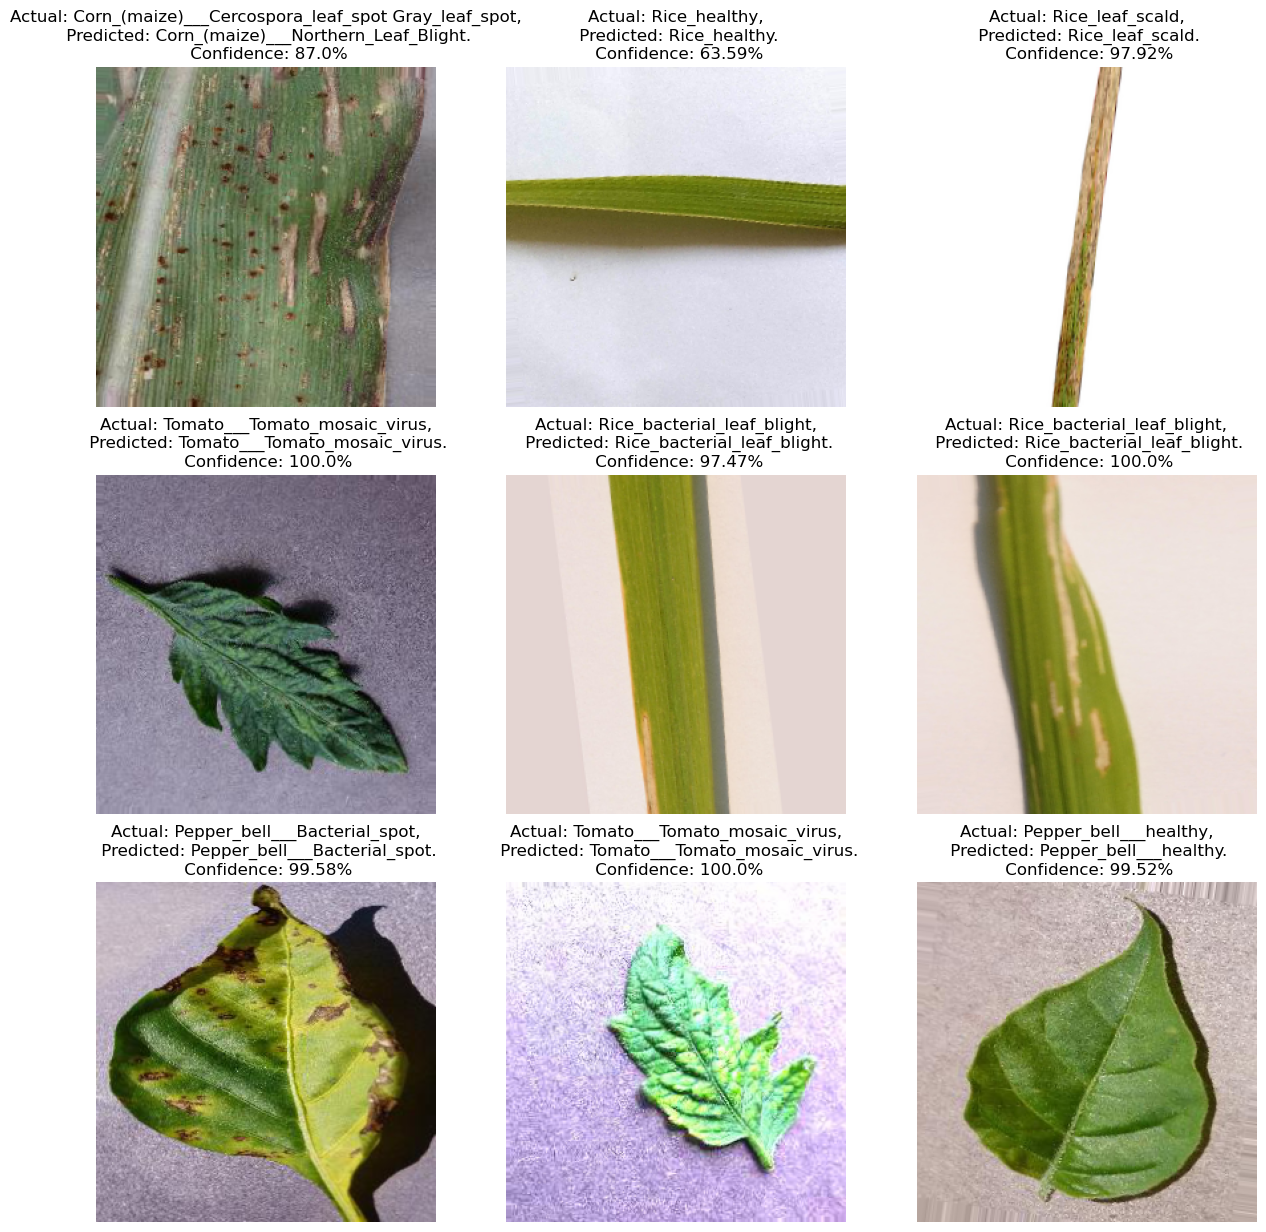

In [20]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [21]:
model.save("../2_newpotatoes.h5")

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
